<a href="https://colab.research.google.com/github/andres-dimate/Data-Quality-Engineer-Junior-en-R5/blob/main/TP2/%20Pueba_Data_Quality_Engineer_Junior_en_R5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primera Parte

El  archivo  extraído de la API de Spotify taylor_swift_spotify.json. crear un script en Python que lo procese y lo deje con el formato dataset.csv . Para esta primera parte de la prueba solo se uso Python y las librerías Pandas y JSON.

*Entregable*: Archivo de Python con la solución del problema.

In [2]:
from google.colab import drive
import pandas as pd
import json

# Montar Google Drive
drive.mount('/content/drive')

# leer la ruta del archivo
file_path = '/content/drive/MyDrive/Proyectos Personales/R5/taylor_swift_spotify.json'

# Leer y procesar el archivo JSON
with open(file_path, 'r') as file:
    data = json.load(file)
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'artist_id': '06HL4z0CvFAxyc27GX', 'artist_name': 'Taylor Swift', 'artist_popularity': 120, 'albums': [{'album_id': '1o59UpKw81iHR0HPiSkJR0', 'album_name': "1989 (Taylor's Version) [Deluxe]", 'album_release_date': '2023-10-27', 'album_total_tracks': 22, 'tracks': [{'disc_number': 1, 'duration_ms': 212600, 'explicit': False, 'track_number': 1, 'audio_features': {'danceability': 0.757, 'energy': 0.61, 'key': 7, 'loudness': -4.84, 'mode': 1, 'speechiness': 0.0327, 'acousticness': 0.00942, 'instrumentalness': 3.66e-05, 'liveness': 0.367, 'valence': 0.685, 'tempo': 116.998, 'id': '4WUepByoeqcedHoYhSNHRt', 'time_signature': 4}, 'track_popularity': 77, 'track_id': '4WUepByoeqcedHoYhSNHRt', 'track_name': "Welcome To New York (Taylor's Version)"}, {'disc_number': 1, 'duration_ms': 231833, 'explicit': False, 'track_number': 2, 'audio_features': {'danceability': 0.733,

In [3]:
# leer el archivo
file_path = '/content/drive/MyDrive/Proyectos Personales/R5/taylor_swift_spotify.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Crear una lista vacía para almacenar todos los datos de las pistas mas adelante
tracks_data = []

# Iterar sobre los álbumes del json y para transformar los datos
for album in data['albums']:
    for track in album['tracks']:
        # la idea es que cada pista tenga datos del álbum y los "audio_features" de manera detallada,
        track_data = track.copy()
        track_data['album_id'] = album['album_id']
        track_data['album_name'] = album['album_name']
        track_data['album_release_date'] = album['album_release_date']
        track_data['album_total_tracks'] = album['album_total_tracks']

        # Extraer cada característica de audio y añadirla al diccionario de la pista
        for feature, value in track['audio_features'].items():
            track_data[f'audio_feature_{feature}'] = value

        del track_data['audio_features']

        # Agregar los datos de la pista a la lista
        tracks_data.append(track_data)

tracks_df = pd.DataFrame(tracks_data)

In [4]:
tracks_df

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,album_id,album_name,album_release_date,...,audio_feature_loudness,audio_feature_mode,audio_feature_speechiness,audio_feature_acousticness,audio_feature_instrumentalness,audio_feature_liveness,audio_feature_valence,audio_feature_tempo,audio_feature_id,audio_feature_time_signature
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-4.840,1,0.0327,0.00942,0.000037,0.3670,0.685,116.998,4WUepByoeqcedHoYhSNHRt,4.0
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-5.376,1,0.0670,5,0,0.1680,0.701,96.057,0108kcWLnn2HlH2kedi1gn,4.0
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-4.785,0,0.0397,0.000421,0.0197,0.0899,0.305,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-5.968,1,0.0447,-0.000537,0.000056,0.3850,0.206,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-5.579,1,0.0317,0.000656,0,0.1310,0.520,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,...,-4.931,1,0.0303,0.111,0,0.3290,0.539,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,...,-3.629,1,0.0646,2,0.000807,0.1030,0.518,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0
536,1,203226,False,13,58,1k3PzDNjg38cWqOvL4M9vq,Invisible,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,...,-5.723,1,0.0243,0.637,0,0.1470,0.233,96.001,1k3PzDNjg38cWqOvL4M9vq,4.0
537,1,220146,False,14,58,0YgHuReCSPwTXYny7isLja,A Perfectly Good Heart,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,...,-5.726,1,0.0365,0.00349,0,0.1280,0.268,156.092,0YgHuReCSPwTXYny7isLja,4.0


In [ ]:
# Guardar el DataFrame como un archivo CSV
tracks_df.to_csv('/content/drive/My Drive/dataset.csv', index=False)

#Segunda Parte

Luego de procesar el archivo descargado de la API de Spotify del punto anterior, se procede a realizar un análisis de calidad de datos sobre el archivo dataset.csv


In [5]:
# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(file_path)

# Análisis inicial de calidad de datos
# 1. Revisar las primeras filas para revisar nuevamente y tner una idea general de la data,
vista_incial = df.head()
vista_incial

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,album_id,album_name,album_release_date,...,audio_feature_loudness,audio_feature_mode,audio_feature_speechiness,audio_feature_acousticness,audio_feature_instrumentalness,audio_feature_liveness,audio_feature_valence,audio_feature_tempo,audio_feature_id,audio_feature_time_signature
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-4.840,1,0.0327,0.009420,3.66e-05,0.3670,0.685,116.998,4WUepByoeqcedHoYhSNHRt,4.0
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-5.376,1,0.0670,5.000000,0,0.1680,0.701,96.057,0108kcWLnn2HlH2kedi1gn,4.0
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-4.785,0,0.0397,0.000421,0.0197,0.0899,0.305,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-5.968,1,0.0447,-0.000537,5.59e-05,0.3850,0.206,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,...,-5.579,1,0.0317,0.000656,0,0.1310,0.520,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0


In [6]:
# 2. Revisar la información general del DataFrame (tipos de datos, valores no nulos, etc.)
data_info = df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   disc_number                     539 non-null    int64  
 1   duration_ms                     539 non-null    int64  
 2   explicit                        539 non-null    object 
 3   track_number                    539 non-null    int64  
 4   track_popularity                539 non-null    int64  
 5   track_id                        531 non-null    object 
 6   track_name                      532 non-null    object 
 7   album_id                        539 non-null    object 
 8   album_name                      477 non-null    object 
 9   album_release_date              539 non-null    object 
 10  album_total_tracks              539 non-null    object 
 11  audio_feature_danceability      537 non-null    float64
 12  audio_feature_energy            537 

In [7]:
# 3. Estadísticas descriptivas básicas para identificar posibles valores atípicos o anomalías
estadisticas = df.describe()
estadisticas

,disc_number,duration_ms,track_number,track_popularity,audio_feature_danceability,audio_feature_energy,audio_feature_key,audio_feature_loudness,audio_feature_mode,audio_feature_speechiness,audio_feature_acousticness,audio_feature_liveness,audio_feature_valence,audio_feature_tempo,audio_feature_time_signature
count,539.000000,539.000000,539.000000,539.000000,537.000000,537.000000,538.000000,537.000000,539.000000,538.000000,538.000000,538.000000,539.000000,538.000000,538.000000
mean,1.031540,236003.725417,11.280148,62.918367,0.587242,0.573065,4.587361,-7.520639,0.912801,0.057709,0.337806,0.163308,0.398410,122.362639,3.986989
std,0.174934,55019.871010,7.965621,22.498757,0.116858,0.192309,3.246082,2.933158,0.282388,0.073146,0.395292,0.141800,0.199409,30.485522,0.197323
min,1.000000,-223093.000000,1.000000,-92.000000,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540,0.033500,0.037400,68.097000,3.000000
25%,1.000000,209486.500000,5.000000,51.000000,0.517000,0.436000,2.000000,-9.287000,1.000000,0.030525,0.036250,0.096500,0.230000,96.684500,4.000000
50%,1.000000,233626.000000,10.000000,69.000000,0.595000,0.589000,5.000000,-6.942000,1.000000,0.037750,0.167500,0.115000,0.386000,119.000500,4.000000
75%,1.000000,259045.500000,15.000000,77.000000,0.661000,0.729000,7.000000,-5.376000,1.000000,0.056400,0.663750,0.162250,0.535000,143.939000,4.000000
max,2.000000,613026.000000,46.000000,152.000000,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000,0.931000,0.943000,208.918000,5.000000


El método describe() se utiliza para calcular algunos datos estadísticos como percentil, media y desviación estándar de los valores numéricos del dataframe

Analizando las estadísticas básicas proporcionadas, varias anomalías y puntos de interés negativos son visibles, particularmente con respecto a los valores negativos:

**duration_ms:**

El valor mínimo es -223,093 ms, lo cual es imposible ya que la duración de una canción no puede ser negativa. Esto indica claramente un error de entrada de datos o un defecto en la extracción de datos.

**track_popularity:**

Hay un valor mínimo de -92, que está fuera del rango esperado para la popularidad de una pista en Spotify (que debería estar entre 0 y 100). Esto sugiere un error en los datos o una posible mala interpretación de cómo se almacenó esta información.

**audio_feature_acousticness:**

Existe un valor máximo de 5, lo cual no tiene sentido ya que la acústica se mide en una escala de 0 a 1. Un valor de 5 implica un error en la entrada de datos o un problema con la forma en que se recopilaron o procesaron los datos.


In [8]:
# 4. Revisar valores únicos para cada columna
valores_unicos = df.nunique()
valores_unicos

disc_number                         2
duration_ms                       364
explicit                            4
track_number                       46
track_popularity                   73
track_id                          512
track_name                        331
album_id                           26
album_name                         24
album_release_date                 23
album_total_tracks                 17
audio_feature_danceability        267
audio_feature_energy              348
audio_feature_key                  12
audio_feature_loudness            448
audio_feature_mode                  2
audio_feature_speechiness         292
audio_feature_acousticness        401
audio_feature_instrumentalness    240
audio_feature_liveness            271
audio_feature_valence             326
audio_feature_tempo               450
audio_feature_id                  519
audio_feature_time_signature        3
dtype: int64

Se utiliza el metodo "nunique", para identificar si hay diversidad en las columnas. con base en encontrar anomalías de calidad de datos.

Las columnas track_id, track_name, album_name, indican una buena variedad de datos.

La columna audio_feature_time_signature tiene 3 valores únicos, lo cual podría ser una señal para investigar si los valores son consistentes con las firmas de tiempo

In [9]:
# 5. Revisar valores nulos para cada columna
valores_nulos = df.isnull().sum()
valores_nulos

disc_number                        0
duration_ms                        0
explicit                           0
track_number                       0
track_popularity                   0
track_id                           8
track_name                         7
album_id                           0
album_name                        62
album_release_date                 0
album_total_tracks                 0
audio_feature_danceability         2
audio_feature_energy               2
audio_feature_key                  1
audio_feature_loudness             2
audio_feature_mode                 0
audio_feature_speechiness          1
audio_feature_acousticness         1
audio_feature_instrumentalness     0
audio_feature_liveness             1
audio_feature_valence              0
audio_feature_tempo                1
audio_feature_id                   0
audio_feature_time_signature       1
dtype: int64

**track_id (8 valores nulos)**: La ausencia de un ID de pista puede dificultar o impedir la identificación única de las pistas. Esto es crítico si el ID se utiliza para unir tablas o realizar búsquedas en bases de datos.

**track_name (7 valores nulos)**: Los nombres de las pistas son importantes para la presentación y búsqueda de datos. La falta de nombres puede afectar la experiencia del usuario y la usabilidad de los datos para propósitos de recomendación o análisis.

**album_name (62 valores nulos)**: Una gran cantidad de valores nulos en esta columna puede afectar el análisis relacionado con álbumes específicos y puede indicar problemas con la consistencia de los datos de álbumes en la fuente de datos.

# Analisis Complementario

# Grafico de VIolin

Distribución de la duración de las pistas por álbum, basado en el dataset. gráfico útil para visualizar la variabilidad de la duración de las pistas dentro de cada álbum y comparar entre diferentes álbumes.

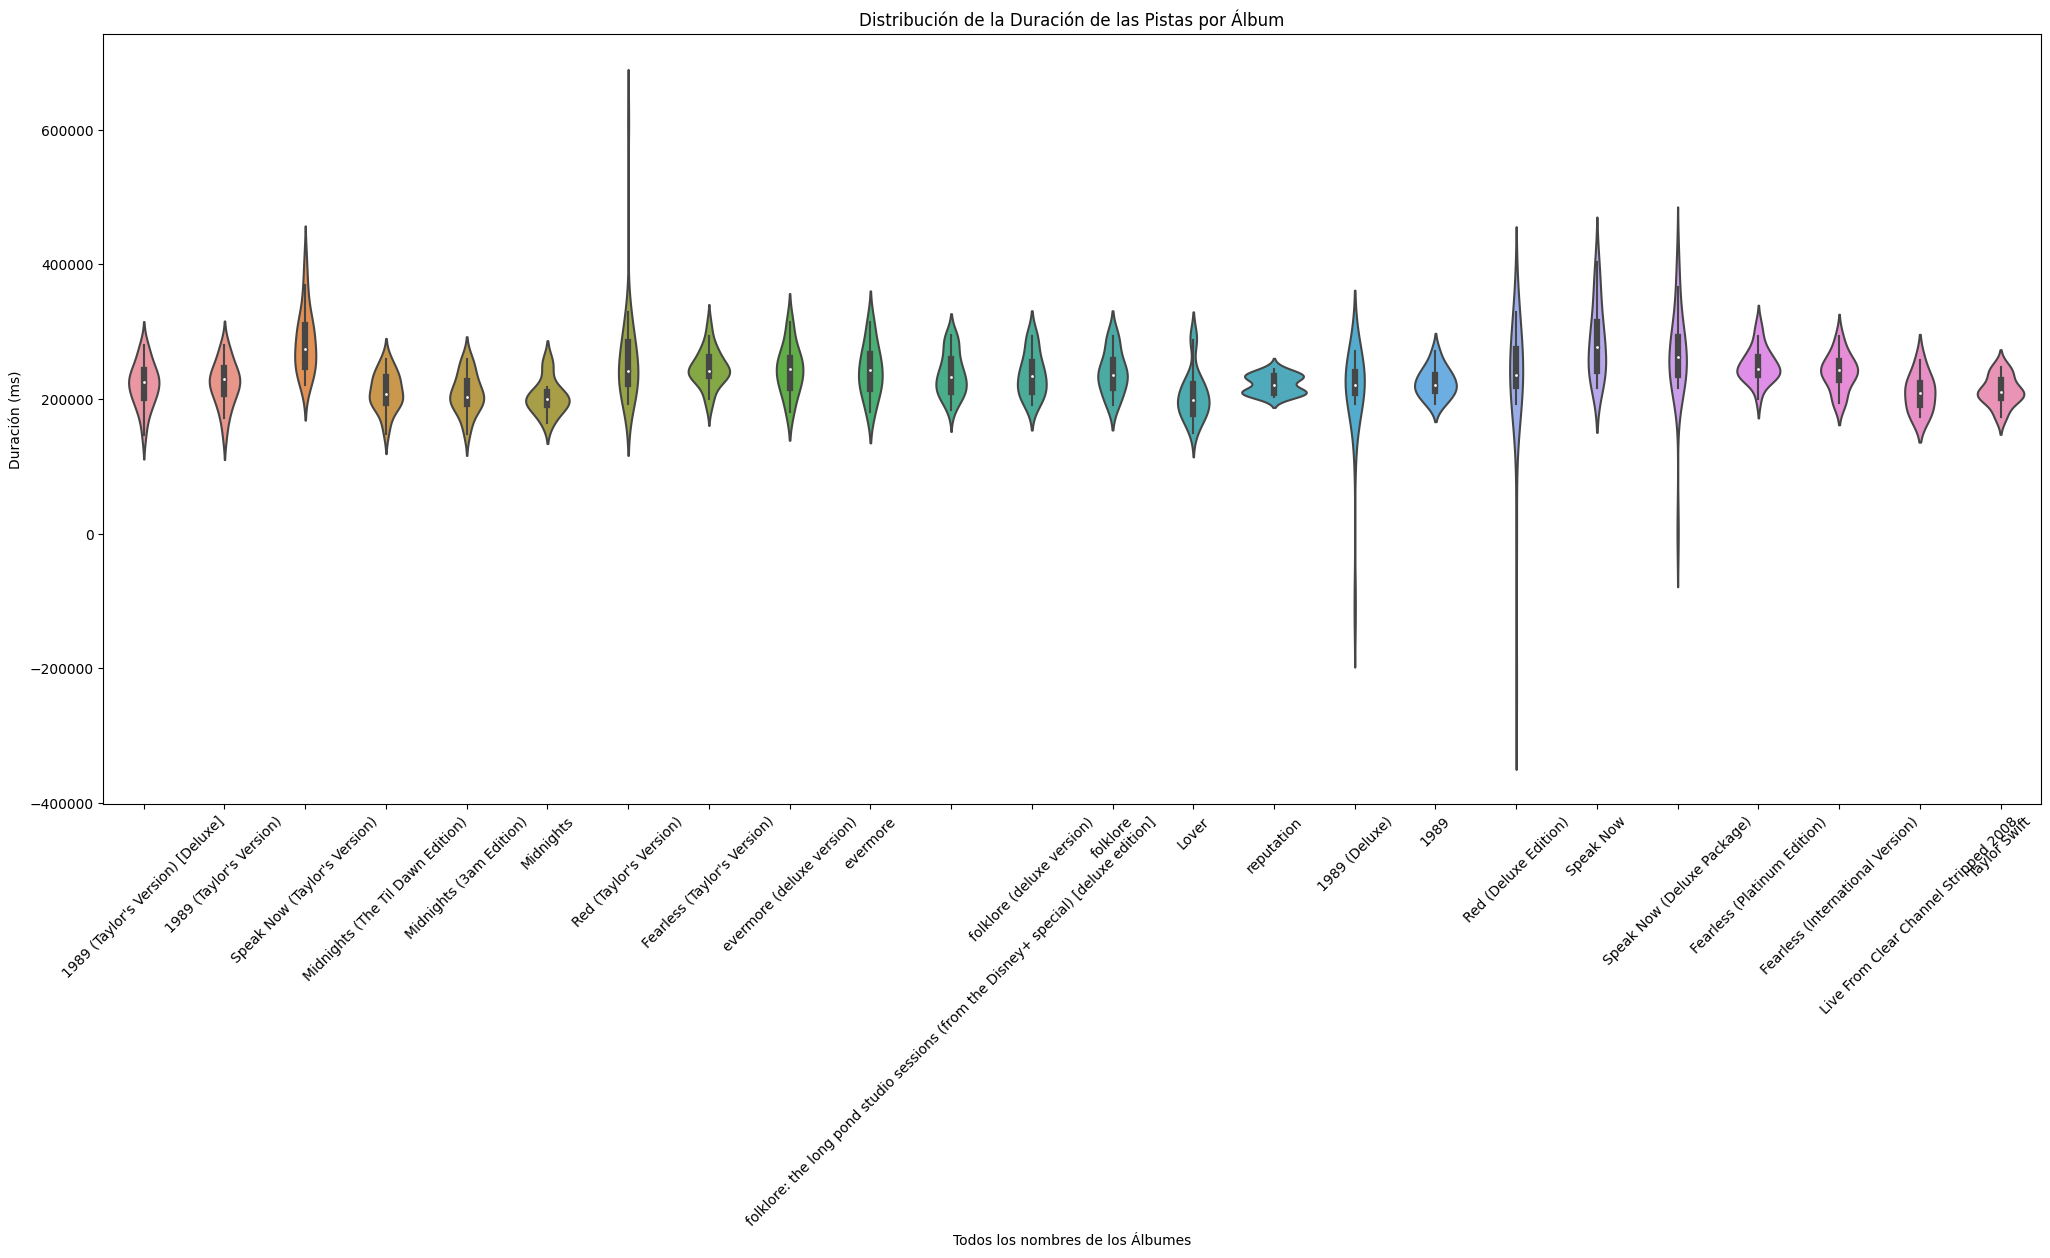

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(file_path)

# Filtrar los datos para eliminar valores negativos o anómalos en 'duration_ms'
#df_filtered = df[df['duration_ms'] > 0]

# Crear un gráfico de violín
plt.figure(figsize=(25, 10))
sns.violinplot(x='album_name', y='duration_ms', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de la Duración de las Pistas por Álbum')
plt.xlabel('Todos los nombres de los Álbumes')
plt.ylabel('Duración (ms)')
plt.show()


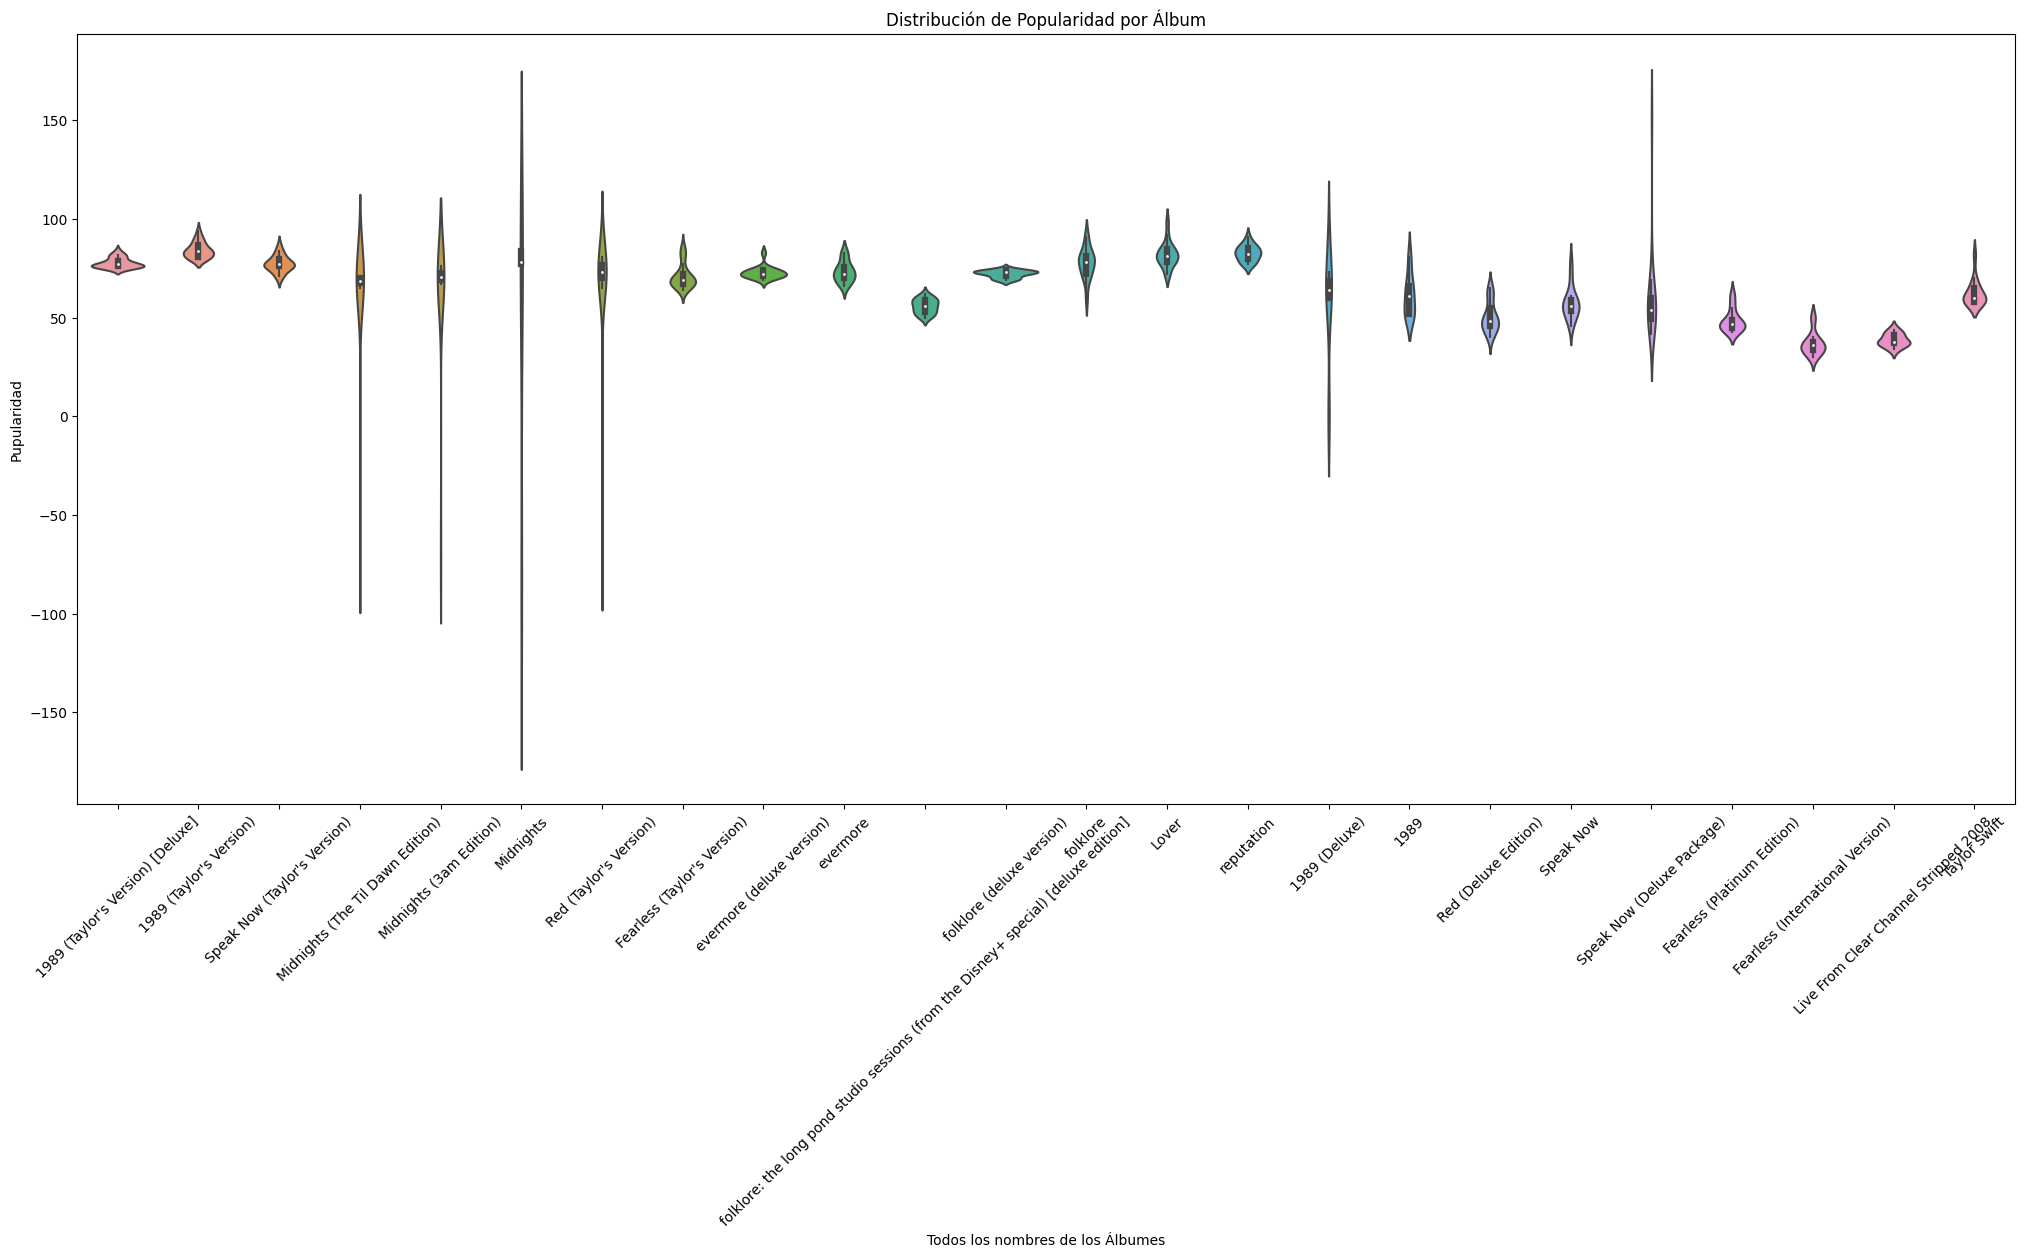

In [24]:
df = pd.read_csv(file_path)

# Crear un gráfico de violín
plt.figure(figsize=(25, 10))
sns.violinplot(x='album_name', y='track_popularity', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de Popularidad por Álbum')
plt.xlabel('Todos los nombres de los Álbumes')
plt.ylabel('Pupularidad')
plt.show()


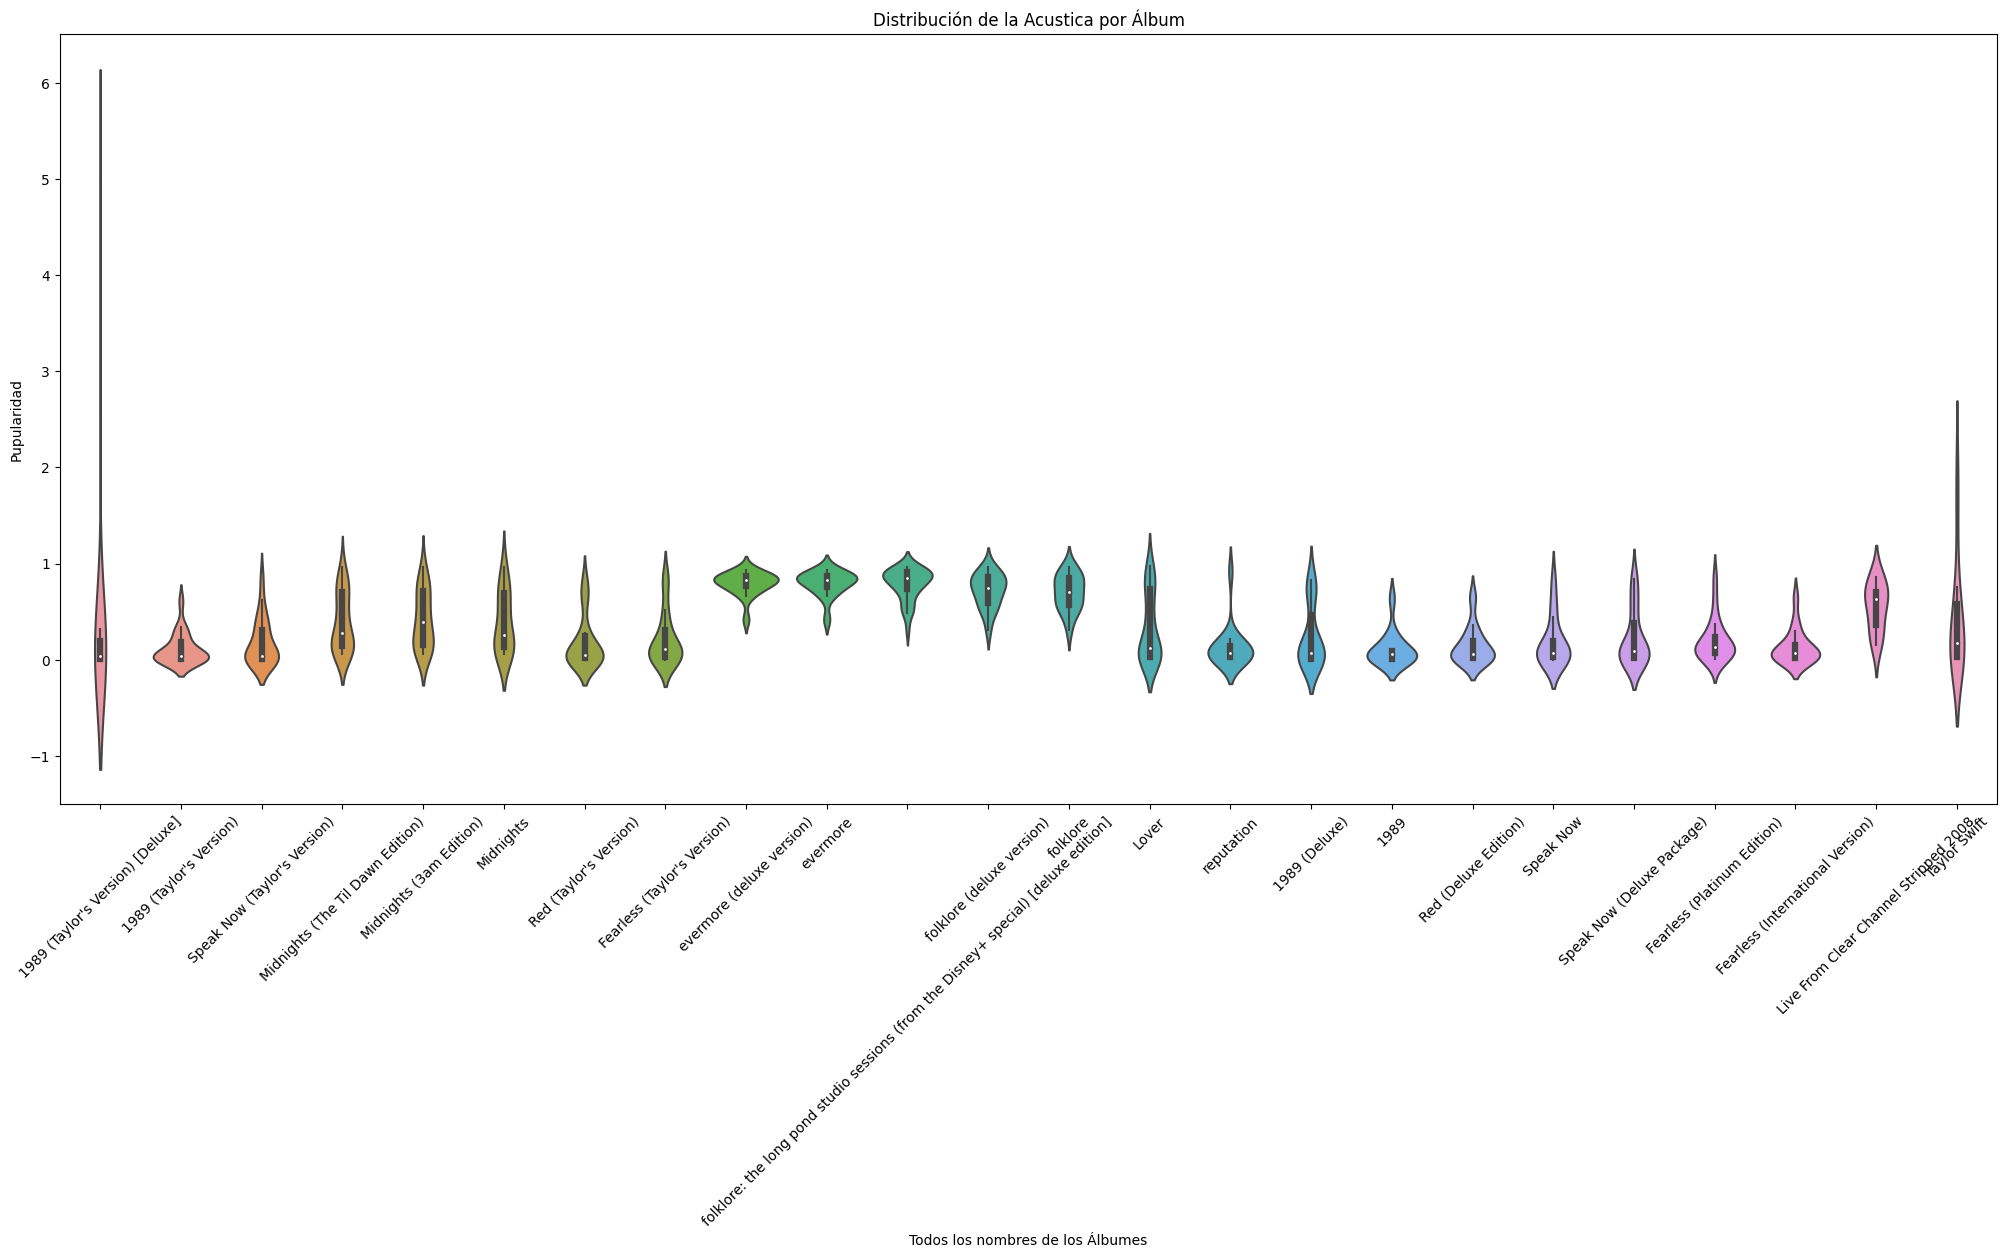

In [23]:
df = pd.read_csv(file_path)

# Crear un gráfico de violín
plt.figure(figsize=(25, 10))
sns.violinplot(x='album_name', y='audio_feature_acousticness', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de la Acustica por Álbum')
plt.xlabel('Todos los nombres de los Álbumes')
plt.ylabel('Pupularidad')
plt.show()

#Matriz de Correlación

 Se realiza una matriz de correlación para las características de audio y la popularidad, con el fin de identificar si hay correlaciones fuertes entre estas, a pesar de tener anomalias en los datos


<ipython-input-17-ced1ad8c959b>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


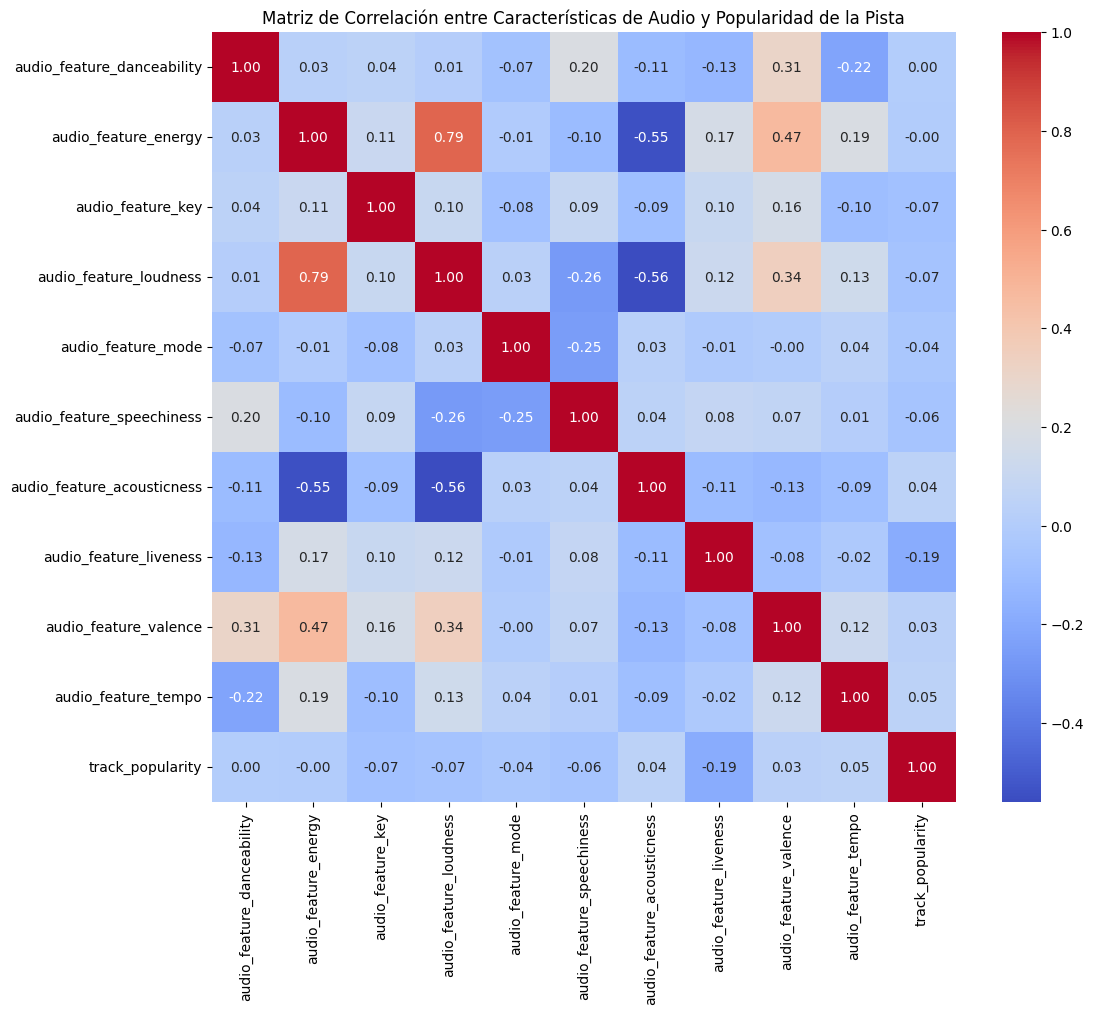

audio_feature_danceability    0.004748
audio_feature_energy         -0.001153
audio_feature_key            -0.073421
audio_feature_loudness       -0.065718
audio_feature_mode           -0.038570
audio_feature_speechiness    -0.058666
audio_feature_acousticness    0.044460
audio_feature_liveness       -0.188295
audio_feature_valence         0.034308
audio_feature_tempo           0.045474
track_popularity              1.000000
Name: track_popularity, dtype: float64

In [17]:
# Seleccionar las columnas de interés para la correlación
columns_of_interest = [
    'audio_feature_danceability', 'audio_feature_energy',
    'audio_feature_key', 'audio_feature_loudness',
    'audio_feature_mode', 'audio_feature_speechiness',
    'audio_feature_acousticness', 'audio_feature_instrumentalness',
    'audio_feature_liveness', 'audio_feature_valence',
    'audio_feature_tempo', 'track_popularity'
]
# Filtrar los datos para eliminar valores negativos o anómalos en 'audio_feature_acousticness'
#df_filtered = df[df['audio_feature_acousticness'] > 0]

# Crear un nuevo DataFrame solo con las columnas de interés
correlation_df = df[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Generar un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Características de Audio y Popularidad de la Pista')
plt.show()

correlation_matrix['track_popularity']  # Análisis de correlación con popularidad de la pista


Dado que existen valores negativos dentro de la base de datos, realiznado un matriz de correlacion teniendo como premisa la columna **track_popularity** nos arroja que ninguna de las características de audio tiene una correlación fuerte con la popularidad de la pista. Las más significativas son negativas y están relacionadas con la caracteristica "liveness", lo que podría sugerir que las pistas que suenan menos como una actuación en vivo tienden a ser más populares. Sin embargo, todas las correlaciones son bastante débiles, lo que implica que no hay una relación lineal directa entre estas características y la popularidad de la pista.